In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score


# Data Import

In [2]:
data = pd.read_csv('/content/countries of the world.csv')

In [3]:
data.head(3)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"


**Data Information**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

We can see that apart from country and region all other countries are numerical GDP, Area, Population is a float/int type. While the rest are object type. We need to convert some to float type. Also arranging the column name

In [5]:
data.columns = (["country","region", "population", "area", "density", "coastline_area_ratio","net_migration", "infant_mortality", "gdp_per_capita",
                 "literacy", "phones", "arable", "crops", "other", "climate", "birthrate", "deathrate", "agriculture", "industry", "service"])

Many columns have object as type, we will fix data types by assigning float/string types to them.

In [6]:
data.country = data.country.astype('category')

data.region = data.region.astype('category')

data.density = data.density.astype(str)
data.density = data.density.str.replace(",",".").astype(float)

data.coastline_area_ratio = data.coastline_area_ratio.astype(str)
data.coastline_area_ratio = data.coastline_area_ratio.str.replace(",",".").astype(float)

data.net_migration = data.net_migration.astype(str)
data.net_migration = data.net_migration.str.replace(",",".").astype(float)

data.infant_mortality = data.infant_mortality.astype(str)
data.infant_mortality = data.infant_mortality.str.replace(",",".").astype(float)

data.literacy = data.literacy.astype(str)
data.literacy = data.literacy.str.replace(",",".").astype(float)

data.phones = data.phones.astype(str)
data.phones = data.phones.str.replace(",",".").astype(float)

data.arable = data.arable.astype(str)
data.arable = data.arable.str.replace(",",".").astype(float)

data.crops = data.crops.astype(str)
data.crops = data.crops.str.replace(",",".").astype(float)

data.other = data.other.astype(str)
data.other = data.other.str.replace(",",".").astype(float)

data.climate = data.climate.astype(str)
data.climate = data.climate.str.replace(",",".").astype(float)

data.birthrate = data.birthrate.astype(str)
data.birthrate = data.birthrate.str.replace(",",".").astype(float)

data.deathrate = data.deathrate.astype(str)
data.deathrate = data.deathrate.str.replace(",",".").astype(float)

data.agriculture = data.agriculture.astype(str)
data.agriculture = data.agriculture.str.replace(",",".").astype(float)

data.industry = data.industry.astype(str)
data.industry = data.industry.str.replace(",",".").astype(float)

data.service = data.service.astype(str)
data.service = data.service.str.replace(",",".").astype(float)



In [7]:

data.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country               227 non-null    category
 1   region                227 non-null    category
 2   population            227 non-null    int64   
 3   area                  227 non-null    int64   
 4   density               227 non-null    float64 
 5   coastline_area_ratio  227 non-null    float64 
 6   net_migration         224 non-null    float64 
 7   infant_mortality      224 non-null    float64 
 8   gdp_per_capita        226 non-null    float64 
 9   literacy              209 non-null    float64 
 10  phones                223 non-null    float64 
 11  arable                225 non-null    float64 
 12  crops                 225 non-null    float64 
 13  other                 225 non-null    float64 
 14  climate               205 non-null    float64 
 15  birthr

In [8]:
data.describe()

,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


Show if there are missing datapoints

In [9]:
print(data.isnull().sum())

country                  0
region                   0
population               0
area                     0
density                  0
coastline_area_ratio     0
net_migration            3
infant_mortality         3
gdp_per_capita           1
literacy                18
phones                   4
arable                   2
crops                    2
other                    2
climate                 22
birthrate                3
deathrate                4
agriculture             15
industry                16
service                 15
dtype: int64


[Text(33.0, 0.5, 'Data Points'),
 Text(0.5, 14.09375, 'columns'),
 Text(0.5, 1.0, 'Missing Data')]

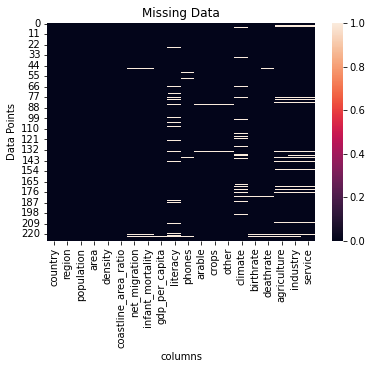

In [10]:
sns.heatmap(data.isnull()).set(title = 'Missing Data', xlabel = 'columns', ylabel = 'Data Points')

WE CAN SEE WE HAVE SOME MISSING POINTS 14 COLUMNS OUT OF 20 HAVE MISSING POINTS. CLIMATE COLUMN HAVE MAXIMUM PERCENTAGE OF MISSING DATA

In [11]:
data.loc[:, ['country', 'region', 'climate', 'agriculture', 'industry', 'service']].head()

,country,region,climate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),1.0,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3.0,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,1.0,0.101,0.600,0.298
3,American Samoa,OCEANIA,2.0,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,3.0,NaN,NaN,NaN


It is clear here that the values in (agriculture, industry, and service) columns are the percentages those different sectors in the economic activity in each country. For example: agriculture is generating 38% of Afganistan's GDP, industry generates 24%, while service generates 38%; the total is 100%.

Now we still have to understand the climate column, let's continue our invistigation:

In [12]:
h1 = data.loc[:, ['country', 'region', 'climate']][data.climate == 1].head()
h2 = data.loc[:, ['country', 'region', 'climate']][data.climate == 2].head()
h3 = data.loc[:, ['country', 'region', 'climate']][data.climate == 3].head()
h4 = data.loc[:, ['country', 'region', 'climate']][data.climate == 4].head()
h5 = data.loc[:, ['country', 'region', 'climate']][data.climate == 1.5].head()
h6 = data.loc[:, ['country', 'region', 'climate']][data.climate == 2.5].head()
pd.concat([h1, h2, h3, h4, h5, h6])

,country,region,climate
0,Afghanistan,ASIA (EX. NEAR EAST),1.0
2,Algeria,NORTHERN AFRICA,1.0
11,Australia,OCEANIA,1.0
13,Azerbaijan,C.W. OF IND. STATES,1.0
15,Bahrain,NEAR EAST,1.0
3,American Samoa,OCEANIA,2.0
6,Anguilla,LATIN AMER. & CARIB,2.0
7,Antigua & Barbuda,LATIN AMER. & CARIB,2.0
10,Aruba,LATIN AMER. & CARIB,2.0
14,"Bahamas, The",LATIN AMER. & CARIB,2.0


# Data Cleaning

Missing Data

In [13]:
print(data.isnull().sum())

country                  0
region                   0
population               0
area                     0
density                  0
coastline_area_ratio     0
net_migration            3
infant_mortality         3
gdp_per_capita           1
literacy                18
phones                   4
arable                   2
crops                    2
other                    2
climate                 22
birthrate                3
deathrate                4
agriculture             15
industry                16
service                 15
dtype: int64


From net_migration,infan_mortality,birthrate 3 missing data points all of them belong to very small nations. We will put 0 for all those 3. GDP_PER_CAPITA has 1 missing value, West Sahara, from internet search, their gdp per capita is $2500. Eighteen missing values of literacy replaced by the mean literacy of each value's region. phones: 4 missing values, replaced by the mean phones of each missing value's region. Arable and crops have 2 missing values of small island we will replace it by zero. Climate has 22 missing value we will replace it by zero where zero will represent unknown value. Birthrate and death rate 3 missing replace with 15 missing values, all belong to very small island nations. After inspection for similar nations, we found that those kind of nations usually have economies that rely heavily on services, with some agricultural and industrial activities. So we will replace the missing values with tthe following: agricultue = 0.15, industry = 0.05. service = 0.8.

In [14]:
data['net_migration'].fillna(0, inplace = True)
data['infant_mortality'].fillna(0, inplace =True)
data['gdp_per_capita'].fillna(2500, inplace =True)
data['literacy'].fillna(data.groupby('region')['literacy'].transform('mean'), inplace= True)
data['phones'].fillna(data.groupby('region')['phones'].transform('mean'), inplace= True)
data['arable'].fillna(0, inplace = True)
data['crops'].fillna(0, inplace = True)
data['other'].fillna(0, inplace = True)
data['climate'].fillna(0, inplace = True)
data['birthrate'].fillna(data.groupby('region')['birthrate'].transform('mean'), inplace = True)
data['deathrate'].fillna(data.groupby('region')['deathrate'].transform('mean'), inplace = True)
data['agriculture'].fillna(0.17, inplace=True)
data['service'].fillna(0.8, inplace=True)
data['industry'].fillna((1 - data['agriculture'] - data['service']), inplace= True)

In [15]:
print(data.isnull().sum())

country                 0
region                  0
population              0
area                    0
density                 0
coastline_area_ratio    0
net_migration           0
infant_mortality        0
gdp_per_capita          0
literacy                0
phones                  0
arable                  0
crops                   0
other                   0
climate                 0
birthrate               0
deathrate               0
agriculture             0
industry                0
service                 0
dtype: int64


# EDA

CORELATION HEATMAP

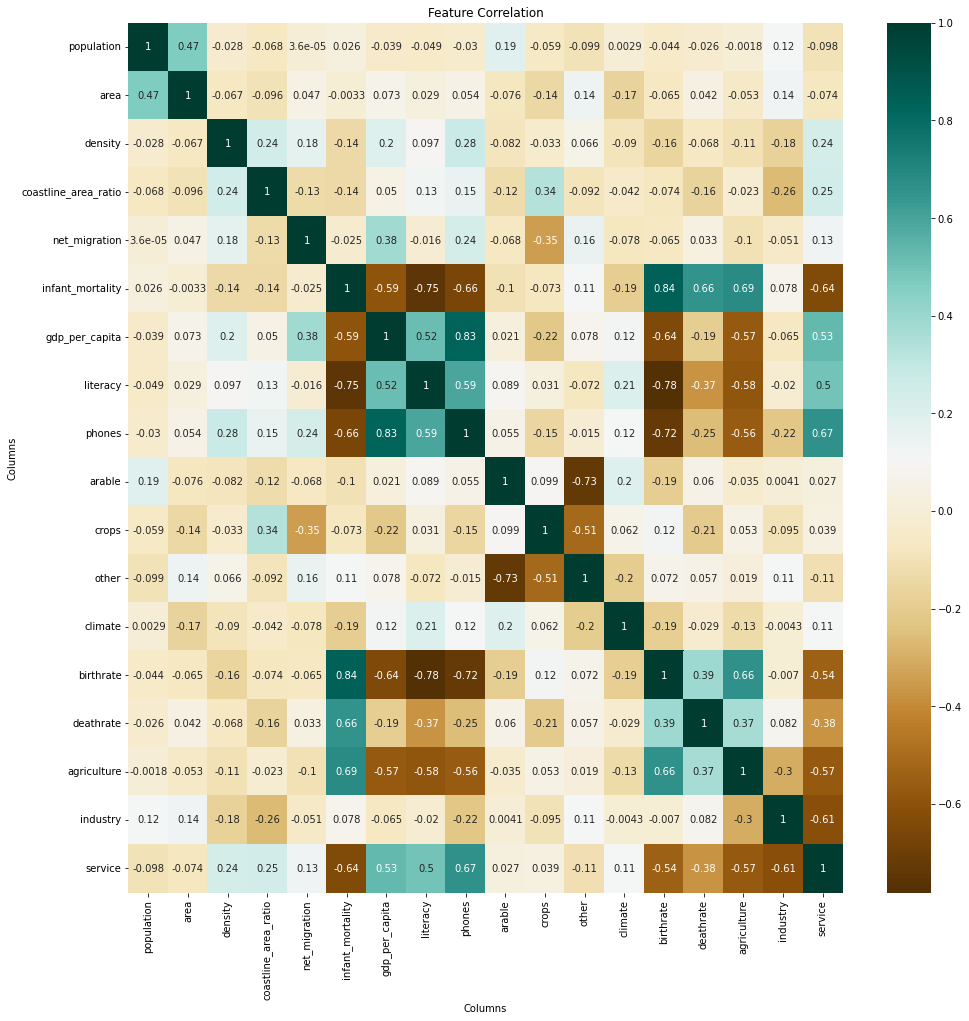

In [16]:
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(data.corr(), annot=True, ax=ax, cmap='BrBG').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

Insights from the above correlation heatmap:

1. correlation between infant_mortality and birthrate
2. correlation between infant_mortality and agriculture
3. correlation between infant_mortality and literacy
4. correlation between gdp_per_capita and phones
5. correlation between arable and other (other than crops)
6. correlation between birthrate and literacy (the less literacy the higher the birthrate)
7. correlation between birthrate and phones


some correlation among few features

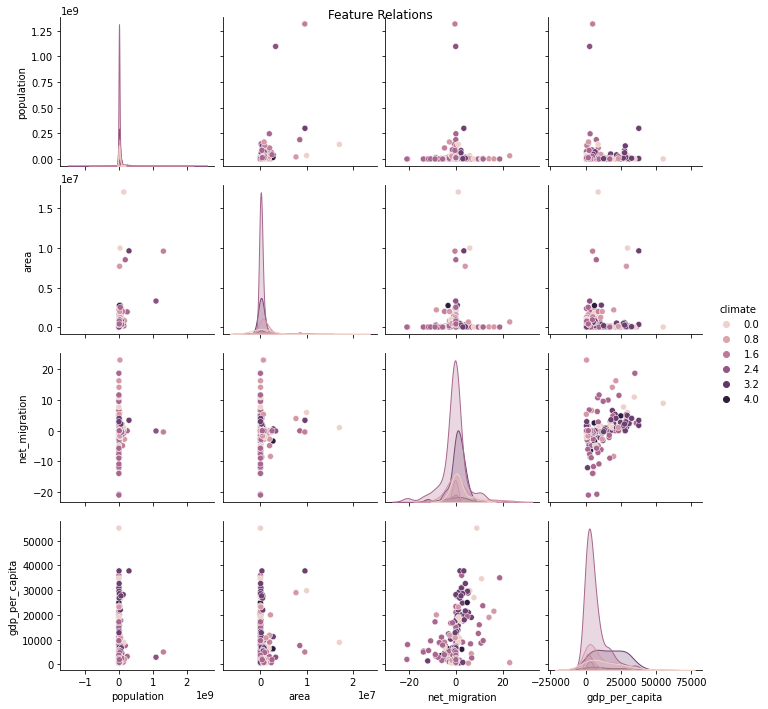

In [17]:
g = sns.pairplot(data[['population', 'area', 'net_migration', 'gdp_per_capita', 'climate']], hue='climate')
g.fig.suptitle('Feature Relations')
plt.show()

We can see a fair correlation between GDP Aand migration,Since migrants tend to move to countries with better opportunity and higher gdp per capita.

Regional Analysis

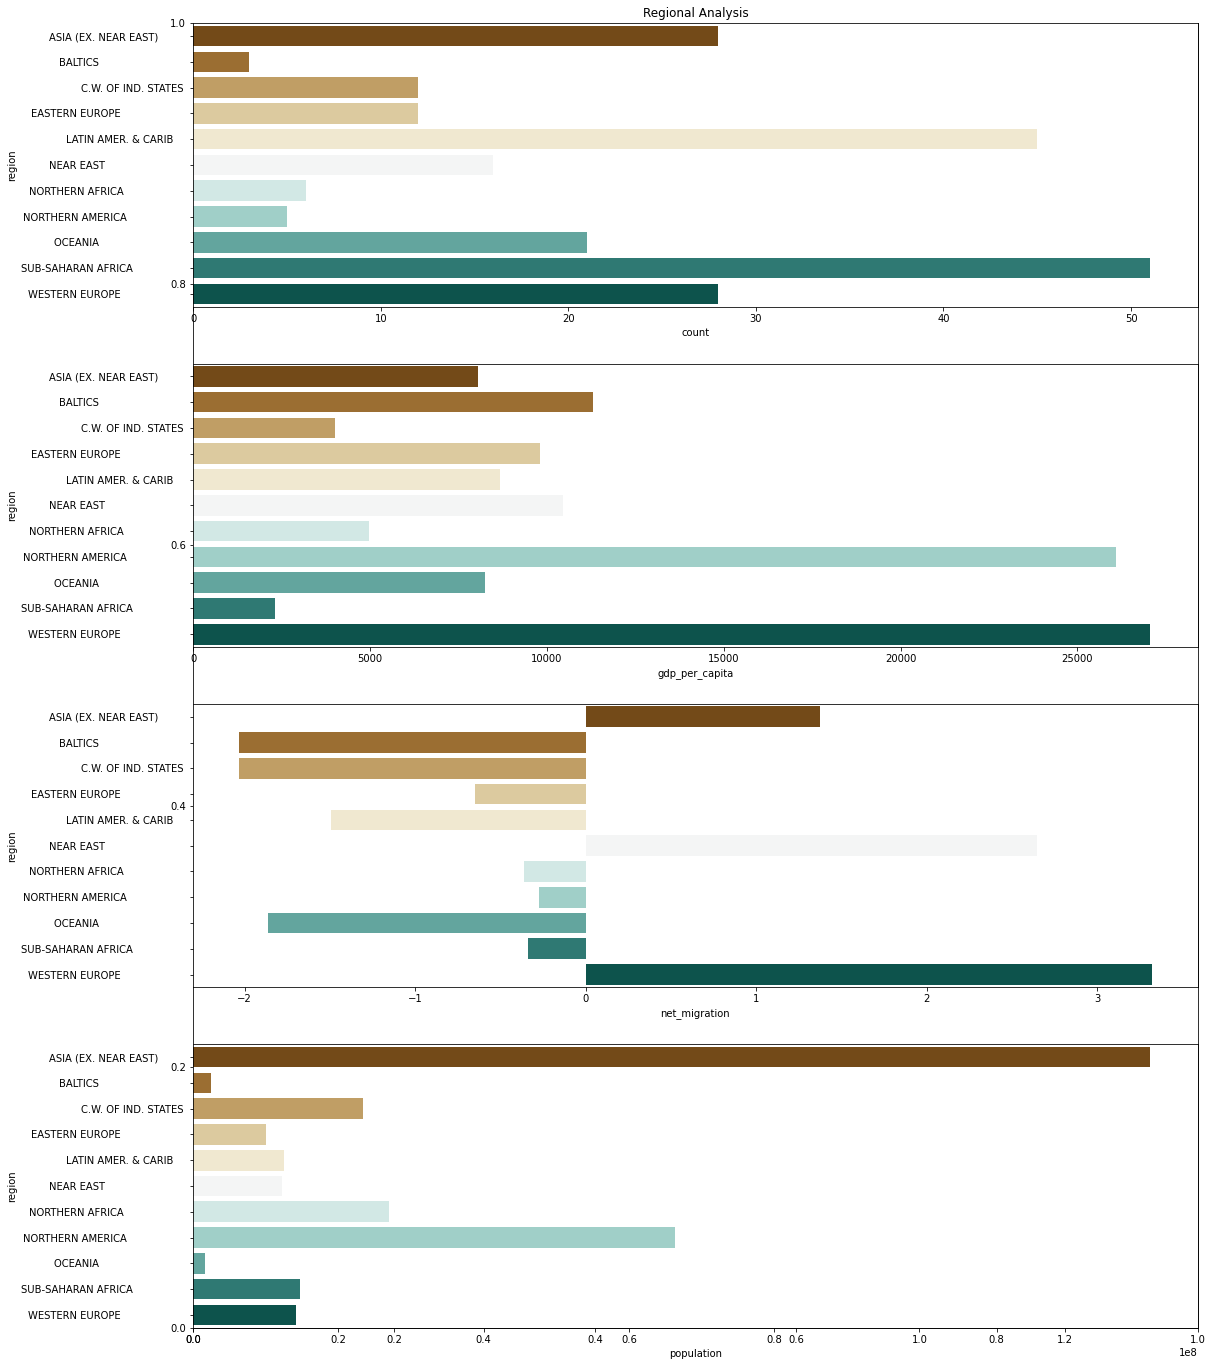

In [18]:
fig = plt.figure(figsize=(18, 24))
plt.title('Regional Analysis')
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)
sns.countplot(data= data, y= 'region', ax= ax1, palette='BrBG')
sns.barplot(data= data, y= 'region', x= 'gdp_per_capita', ax= ax2, palette='BrBG', ci= None)
sns.barplot(data= data, y= 'region', x= 'net_migration', ax= ax3, palette='BrBG', ci= None)
sns.barplot(data= data, y= 'region', x= 'population', ax= ax4, palette='BrBG', ci= None)
plt.show()

From the above figure we can notice the following

1.Sub-Saharian Africa and Latin America regions have the most countries whithen them.

1.   Sub-Saharian Africa and Latin America regions have the most countries whithen them.
1.   Asia, North America, and North Europe, are the main regions where migrants from other regions go.
2.   Western Europe and North America have the highest GDP per capita, while Sub-Saharian Africa has the lowest GDP per capita.

1.   Asia has the largest population, Oceania has the smallest.



**GDP Analysis** 

The figure below shows the regional ranking according to the average GDP per capita. As expected, North America and Western Europe have the highest GDP per capita, while Sub Saharian Africa has the lowest, and that may describes the large migration trends in the world in the past decade.

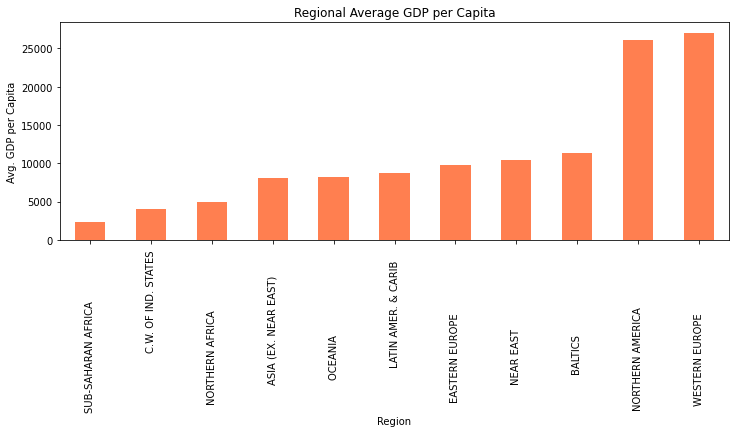

In [19]:
fig = plt.figure(figsize=(12, 4))
data.groupby('region')['gdp_per_capita'].mean().sort_values().plot(kind='bar', color='coral')
plt.title('Regional Average GDP per Capita')
plt.xlabel("Region")
plt.ylabel('Avg. GDP per Capita')
plt.show()

<Figure size 864x864 with 0 Axes>

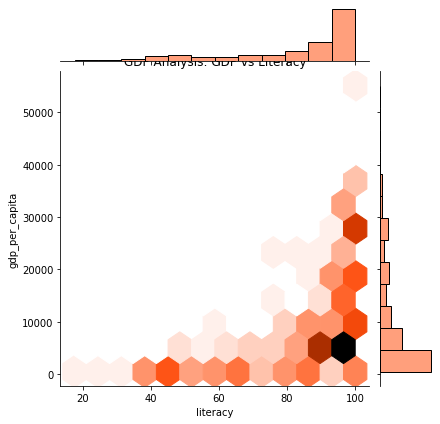

In [20]:
fig = plt.figure(figsize=(12,12))
sns.jointplot(data=data, x='literacy', y = 'gdp_per_capita', kind='hex', color='coral')
plt.title('GDP Analysis: GDP vs Literacy')
plt.show()

From the above figure it is clear that higher the country's gdp, the more literate the population is and vice versa

<Figure size 864x864 with 0 Axes>

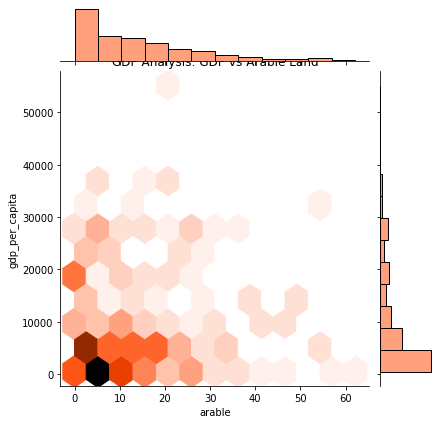

In [21]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= data, x= 'arable', y= 'gdp_per_capita', kind= 'hex', color='coral')
plt.title('GDP Analysis: GDP vs Arable Land')
plt.show()

No clear relationship between GDP and percentage of arable land. This indicates that agriculture is not the strongest factor economically. It is used by human history since past 6000 years

<Figure size 864x864 with 0 Axes>

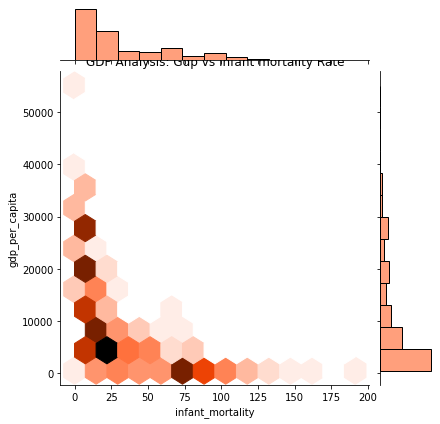

In [22]:
fig = plt.figure(figsize=(12,12))
sns.jointplot(data = data, x = 'infant_mortality', y='gdp_per_capita', kind='hex', color = 'coral')
plt.title('GDP Analysis: Gdp vs infant mortality Rate')
plt.show()

From the figure above, it is very clear that poor countries suffer more from infant mortality

# Data Pre-Conditioning

Now we will make our dataset ready for model training.


1.   Transform'region' column into numerical column
2.   splitting the dataset into training and testing parts(80/20) and dropping the country column as it is the string datatype and cannot be used to train the models and seperating gdp_per_capita column as our label column
3.We will try different splits of our datasets(with and without feature selection / with and without feature scaling)



**Region Transform**

In [23]:
data_final = pd.concat([data,pd.get_dummies(data['region'], prefix='region')], axis =1).drop(['region'],axis=1)
print(data_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   country                                     227 non-null    category
 1   population                                  227 non-null    int64   
 2   area                                        227 non-null    int64   
 3   density                                     227 non-null    float64 
 4   coastline_area_ratio                        227 non-null    float64 
 5   net_migration                               227 non-null    float64 
 6   infant_mortality                            227 non-null    float64 
 7   gdp_per_capita                              227 non-null    float64 
 8   literacy                                    227 non-null    float64 
 9   phones                                      227 non-null    float64 
 10  ar

In [24]:
data_final.head()

,country,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,phones,...,region_BALTICS,region_C.W. OF IND. STATES,region_EASTERN EUROPE,region_LATIN AMER. & CARIB,region_NEAR EAST,region_NORTHERN AFRICA,region_NORTHERN AMERICA,region_OCEANIA,region_SUB-SAHARAN AFRICA,region_WESTERN EUROPE
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,...,0,0,0,0,0,0,0,0,0,0
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,...,0,0,1,0,0,0,0,0,0,0
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,...,0,0,0,0,0,1,0,0,0,0
3,American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,...,0,0,0,0,0,0,0,1,0,0
4,Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,...,0,0,0,0,0,0,0,0,0,1


**Data Split1: all final dataset no scaling**

In [25]:
y = data_final['gdp_per_capita']
X = data_final.drop(['gdp_per_capita','country'], axis = 1)

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=101)

 **Data Split 2: all of our final dataset, with **scaling****

In [26]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test



**Data Split 3: feature selected dataset, no scaling**

we will  select only a portion of our features, ones with correlation score larger than +/- 0.3 wit gdp_capita

In [27]:
y3 = y
X3 = data_final.drop(['gdp_per_capita','country','population', 'area', 'coastline_area_ratio', 'arable',
                      'crops', 'other', 'climate', 'deathrate', 'industry'], axis=1)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101)

**Data Split 4: feature selected dataset, with scaling**



In [28]:
sc_X4 = StandardScaler()

X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

# Linear Regression

From EDA, we can see most of our feature do not have a linear relationship with gdp_per_capita, yet we will perform linear regression on them and see the result

**Model Training**



In [29]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

lm3 = LinearRegression()
lm3.fit(X3_train,y3_train)

lm4 = LinearRegression()
lm4.fit(X4_train,y4_train)

LinearRegression()

Predictions

In [30]:
lm1_pred = lm1.predict(X_test)
lm2_pred = lm2.predict(X2_test)
lm3_pred = lm3.predict(X3_test)
lm4_pred = lm4.predict(X4_test)

Evaluation

Linear Regression Performance

all features, no scaling:
MAE: 330350.8586602018
RMSE: 574.7615667911363
R2_Score: -29843.120383362064

all feature with scaling:
MAE 569019.4687588011
RMSE: 754.3337913409429
R2_square: -19925.99011846088

Feature selected dataset with no scaling:
MAE: 2965.9357229398806
RMSE: 54.46040509342435
R2_square: 0.7976685756858997

Selected feature with scaling:
MAE 2879.5213243944427
RMSE 53.66117147802909
R2_squre 0.8292247702712089


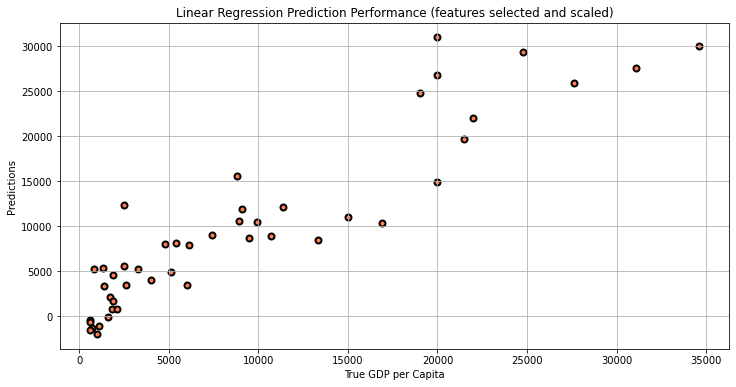

In [31]:
print('Linear Regression Performance')

print('\nall features, no scaling:')
print('MAE:', metrics.mean_absolute_error(y_test,lm1_pred))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test,lm1_pred)))
print('R2_Score:', metrics.r2_score(y_test,lm1_pred))


print('\nall feature with scaling:')
print('MAE',metrics.mean_absolute_error(y2_test,lm2_pred))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y2_test,lm2_pred)))
print('R2_square:', metrics.r2_score(y2_test,lm2_pred))

print('\nFeature selected dataset with no scaling:')
print('MAE:',metrics.mean_absolute_error(y3_test,lm3_pred))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y3_test,lm3_pred)))
print('R2_square:', metrics.r2_score(y3_test,lm3_pred))

print('\nSelected feature with scaling:')
print('MAE', metrics.mean_absolute_error(y4_test,lm4_pred))
print('RMSE', np.sqrt(metrics.mean_absolute_error(y4_test,lm4_pred)))
print('R2_squre', metrics.r2_score(y4_test,lm4_pred))


fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,lm4_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (features selected and scaled)') 
plt.grid()
plt.show()


It is clear that feature selection is essential in order to get accepted results on the dataset. On the other hand, feature scaling has a small positive effect on Linear regression performance.

# **SVM**

In [32]:
svm1 = SVR(kernel='rbf')
svm1.fit(X_train,y_train)

svm2 = SVR(kernel='rbf')
svm2.fit(X2_train,y2_train)

svm3 = SVR(kernel='rbf')
svm3.fit(X3_train,y3_train)

svm4 = SVR(kernel='rbf')
svm4.fit(X4_train,y4_train)

SVR()

Predictions

In [33]:
svm1_pred = svm1.predict(X_test)
svm2_pred = svm2.predict(X2_test)
svm3_pred = svm3.predict(X3_test)
svm4_pred = svm4.predict(X4_test)

Evaluation

SVM Performance:

all features, No scaling:
MAE: 7049.984895264721
RMSE: 9811.73631340298
R2_Score:  -0.16510345624387246

all features, with scaling:
MAE: 7042.737596769212
RMSE: 9800.406046613498
R2_Score:  -0.16241416444556656

selected features, No scaling:
MAE: 7047.711927073501
RMSE: 9807.997922107874
R2_Score:  -0.16421578810668724

selected features, with scaling:
MAE: 7040.043820847137
RMSE: 9794.58886537642
R2_Score:  -0.1610346364957338


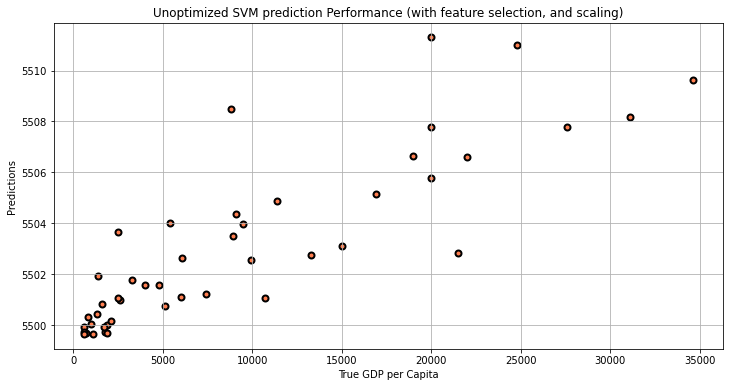

In [34]:
print('SVM Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, svm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, svm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, svm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, svm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, svm2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, svm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, svm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, svm3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, svm4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, svm4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, svm4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,svm3_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Unoptimized SVM prediction Performance (with feature selection, and scaling)') 
plt.grid()
plt.show()

Feature scaling, and feature selection, made almost no difference in the prediction performance of the SVM algorithm.


The results of SVM is worse than that of Linear Regression, so we will try to improve SVM's performance by optimizing its parameters using grid search.

Optimizing SVM

In [35]:
param_grid = {'C': [1, 10, 100], 'gamma': [0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [36]:
grid.fit(X4_train,y4_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.324 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.115 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.372 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.026 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.325 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.158 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.117 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.373 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.027 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.325 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.0001, kernel=rbf;, 

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [37]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [38]:
grid.best_estimator_

SVR(C=100, gamma=0.01)

In [39]:

grid_predictions = grid.predict(X4_test)



MAE: 6386.413128432553
RMSE: 9133.499345710767
R2_Score:  -0.009594923559210988


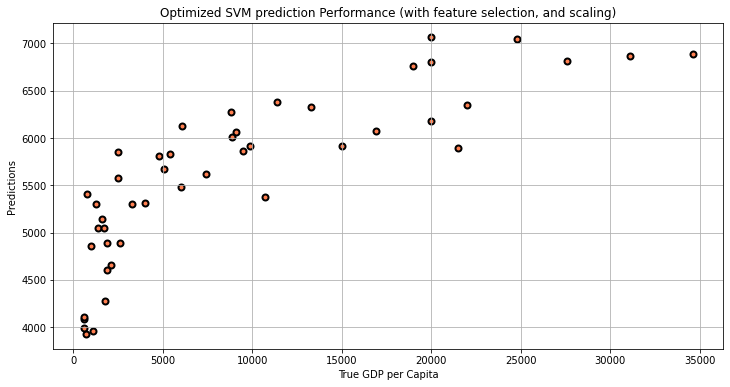

In [40]:
print('MAE:', metrics.mean_absolute_error(y4_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, grid_predictions)))
print('R2_Score: ', metrics.r2_score(y4_test, grid_predictions))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized SVM prediction Performance (with feature selection, and scaling)') 
plt.grid()
plt.show()

SVM has improved a little with grid search, but it still performs below linear regression.

# Random Forest

Let's first try random forest with our data splits (with and without feature selection). Scaling is not going to be tested for Random Forest, since it should not affect this algorithm's performance. later we will try to improve its performance.

Training

In [42]:
rf1 = RandomForestRegressor(random_state=101, n_estimators=200)
rf3 = RandomForestRegressor(random_state = 101, n_estimators = 200)

rf1.fit(X_train, y_train)
rf3.fit(X3_train, y3_train)

RandomForestRegressor(n_estimators=200, random_state=101)

Prediction

In [46]:
rf1_pred = rf1.predict(X_test)
rf3_pred = rf3.predict(X3_test)

Evaluation

Random Forest Performance:

all features, No scaling:
MAE: 2142.1304347826085
RMSE: 3097.1944738255706
R2_Score:  0.8839060185534444

selected features, No scaling:
MAE: 2416.0652173913045
RMSE: 3533.590316058036
R2_Score:  0.8488858452472634


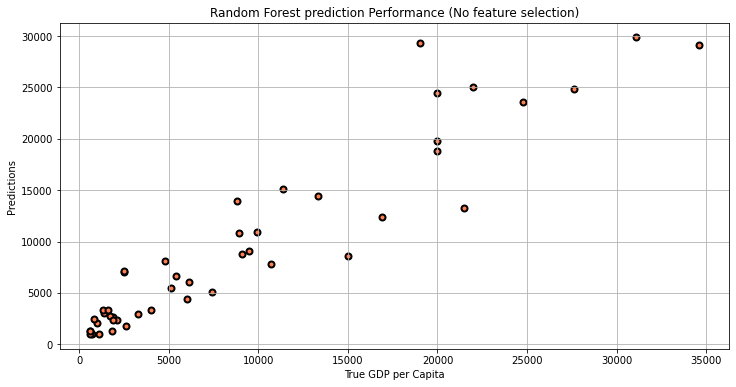

In [47]:
print('Random Forest Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, rf1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf1_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, rf3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, rf3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, rf3_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Random Forest prediction Performance (No feature selection)') 
plt.grid()
plt.show()

**Optimization**

We will use grid search in order to obtain good parameters for our RF regressor. Of course our optimization here will be limited due to time and computing power constraints. The parameters we will optimiz are:



1.   n-estimators
2.   min_samples_leaf

1.   max_features
2.   bootstrap






In [48]:
rf_param_grid = {'max_features':['square', 'auto'],
                 'min_samples_leaf': [1,3,5],
                 'n_estimators': [100, 500, 1000],
                 'bootstrap':[False,True]
                 
    
}

In [50]:
rf_grid= GridSearchCV(estimator = RandomForestRegressor(), param_grid = rf_param_grid, n_jobs=1, verbose = 0)

In [51]:
rf_grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'bootstrap': [False, True],
                         'max_features': ['square', 'auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 500, 1000]})

In [53]:
rf_grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'n_estimators': 100}

In [54]:
rf_grid.best_estimator_

RandomForestRegressor(min_samples_leaf=3)

In [55]:
rf_grid_predictions = rf_grid.predict(X_test)

MAE: 2200.8313461900425
RMSE: 3234.9410852486762
R2_Score:  0.8733499091673186


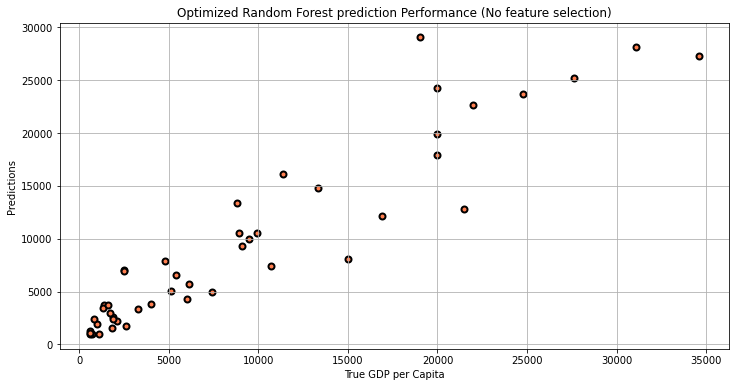

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, rf_grid_predictions))
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf_grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized Random Forest prediction Performance (No feature selection)') 
plt.grid()
plt.show()

We can see that the optimization process on RF regressor has not changed the performance in a noticebale manner, yet the slight change was actually to the worst, that is probably because our initial parameters were already very close to the optimum ones.

# Gradient Boosting


Training
We will first traing the GBM regressor with the default parameter values, then we will try optimizing its parameters.

In [52]:
gbm1 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3,
                                 subsample=1.0, max_features= None, random_state=101)
gbm3 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3,
                                 subsample=1.0, max_features= None, random_state=101)

gbm1.fit(X_train, y_train)
gbm3.fit(X3_train, y3_train)

GradientBoostingRegressor(random_state=101)

In [57]:
gbm1_pred = gbm1.predict(X_test)
gbm3_pred = gbm3.predict(X3_test)

# Evaluation

Gradiant Boosting Performance:

all features, No scaling:
MAE: 2280.4625959347395
RMSE: 3413.6352435789836
R2_Score:  0.8589714692004253

selected features, No scaling:
MAE: 2467.2081266874507
RMSE: 3789.2979753946875
R2_Score:  0.8262238105475073


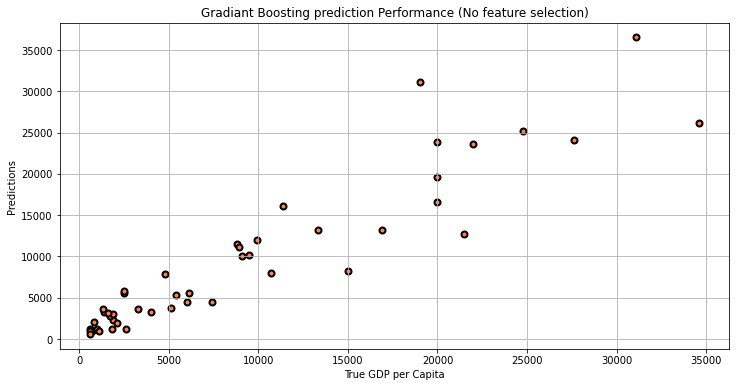

In [58]:
print('Gradiant Boosting Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, gbm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, gbm1_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, gbm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, gbm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, gbm3_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,gbm1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Gradiant Boosting prediction Performance (No feature selection)') 
plt.grid()
plt.show()

It is clear that Gradiant Boosting gave us good performance even before optimization. Its performance on our dataset is very close to that of Random Forest.

# Feature Importance

We can plot how the GBM regressor sees the importance of different features in the dataset.

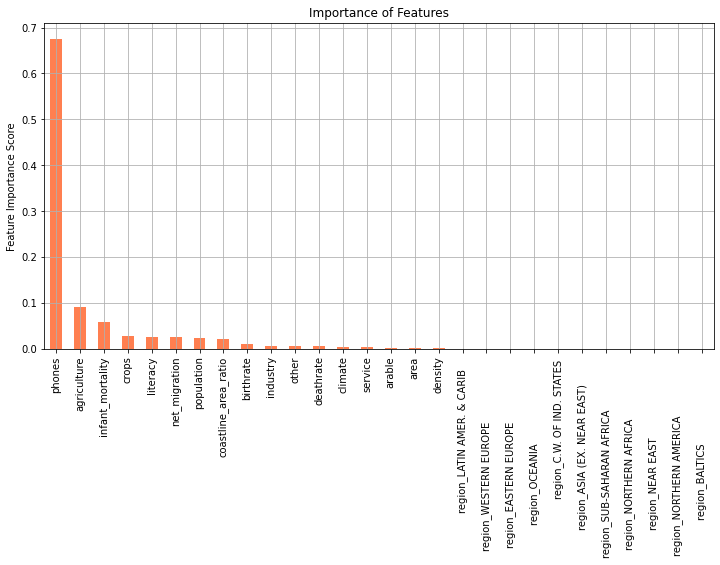

In [59]:
feat_imp = pd.Series(gbm1.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Importance of Features', color= 'coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()


The number of phones seems to have the highest predictive power.

With this first model, we obtain an R2_Score of 0.8590, which is not very far behind that of Random Forest regressor. Next we will try to optimize GBM, and compare its performance to that of Random Forest and the one above. Also, we will plot the feature importance chart, and observe if GBM changed the features importance score after optimization.

**GBM Optimization**

We will use grid search in order to obtain good parameters for our GBM regressor. Of course our optimization here will be limited due to time and computing power constraints. The parameters we will optimiz are:



*   n-estimators: 100, 500, 1000
*  learning_rate: 0.001, 0.01, 0.1, 1

*   max_depth: 3, 5, 8

*   subsample: 0.7, 1 (Values lower than 1 generally lead to a reduction of variance and an increase in bias)

*   min_samples_leaf: 1, 20


*   min_samples_split: 0.5-1% of our data --> we have 227 datapoints --> 10 -20

*  max_features: 4, 7 (sqrt of number of features is a good guess)








In [60]:
gbm_param_grid = {'learning_rate':[1,0.1, 0.01, 0.001], 
           'n_estimators':[100, 500, 1000],
          'max_depth':[3, 5, 8],
          'subsample':[0.7, 1], 
          'min_samples_leaf':[1, 20],
          'min_samples_split':[10, 20],
          'max_features':[4, 7]}

gbm_tuning = GridSearchCV(estimator =GradientBoostingRegressor(random_state=101),
                          param_grid = gbm_param_grid,
                          n_jobs=-1,
                          cv=5)

gbm_tuning.fit(X_train,y_train)
print(gbm_tuning.best_params_)

{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500, 'subsample': 0.7}


In [61]:

gbm_grid_predictions = gbm_tuning.predict(X_test)

MAE: 2362.9354066125907
RMSE: 3469.360881371261
R2_Score:  0.8543294671599899


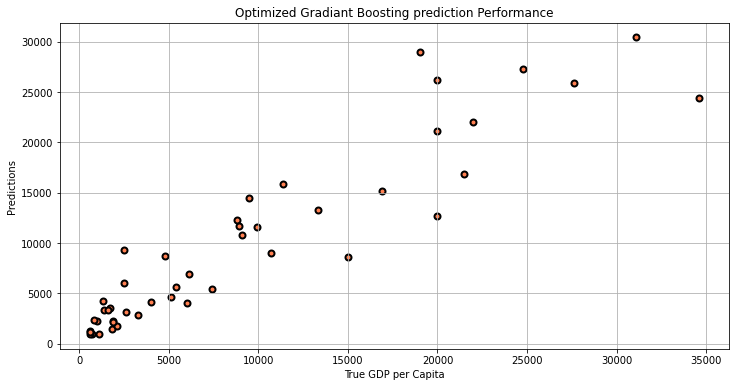

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, gbm_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbm_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, gbm_grid_predictions))
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,gbm_grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized Gradiant Boosting prediction Performance') 
plt.grid()
plt.show()

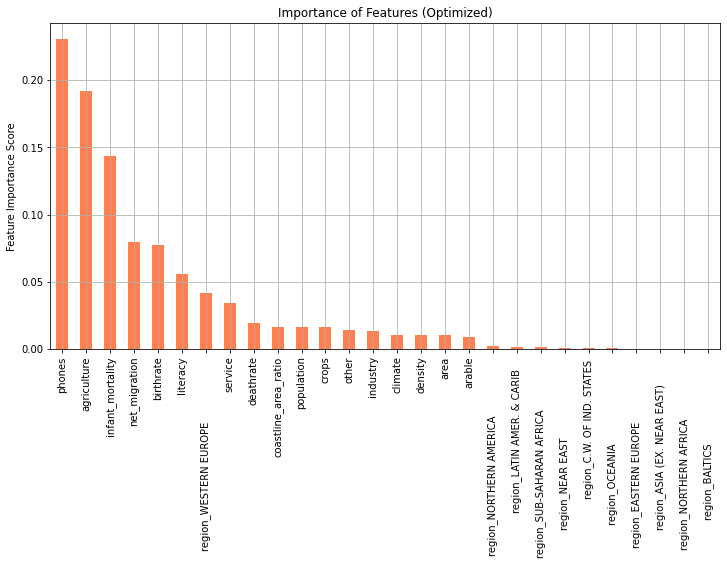

In [63]:
gbm_opt = GradientBoostingRegressor(learning_rate=0.01, n_estimators=500,max_depth=5, min_samples_split=10, min_samples_leaf=1, 
                                    subsample=0.7,max_features=7, random_state=101)
gbm_opt.fit(X_train,y_train)
feat_imp2 = pd.Series(gbm_opt.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp2.plot(kind='bar', title='Importance of Features (Optimized)', color= 'coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()


We can see that the grid search actually decreased the GBM performance a bit, the reason is that we could not extend the grid search limits, due to processing limits. Yet, we can notice that grid search resulted in a different features importance scores. In general, we can say that GBM has a similar performance to that of Random Forest on our dataset.

# Conclusion

In this project, we used countries_of_the_world dataset to build a GDP predictor. 4 different learning regressors (Linear Regression, SVM, Random Forest, and Gradiant Boosting) were tested, and we have acheived the best prediction performance using Random Forest, followed by Gradiant Boosting, and then Linear Regression, while SVM acheived the worst performance of the 4.

The best prediction performance was acheived using Random Forest regressor, using all features in the dataset, and resulted in the following metrics: